In [32]:
!pip install -q scikit-learn

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

print(sklearn.__version__)

1.5.1


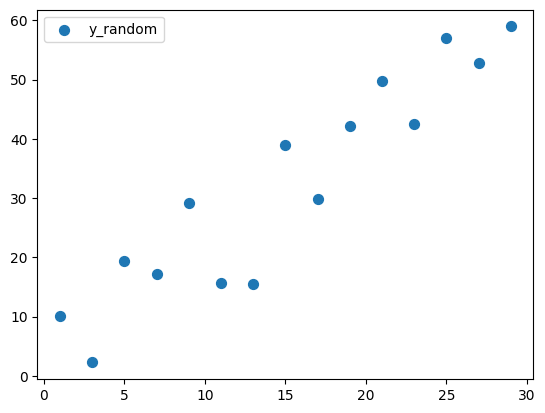

In [48]:
## 회귀분석
np.random.seed(910) #난수 생성기에 시드 설정. 같은 시드 사용시 같은 난수 생성
x = np.arange(1, 30, 2) #arange(start, stop, step) 지정된 범위 내 숫자생성
y = 2*x + 1 #coefficient = 2, intercept = 1 
y_random = y + np.random.normal(0, 8, len(y)) #normal(mean, std, len)
#y_random : 실제값, yhat = 예측치(추정값)
#기존 배열 y에 정규분포에서 생성된 랜덤노이즈를 추가하여 새로운배열 y_random생성

#plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.legend()
plt.show()

In [49]:
# 회귀계수 예측하기 (OLS *최소제곱추정량)
# y=2x+1 일 때 2: 회귀계수(Beta1, coef), 1: 절편(Beta0)
x_mean = np.mean(x)
y_mean = np.mean(y_random)
Sxy = sum((x - x_mean)*(y_random - y_mean))
Sxx = sum((x- x_mean)**2)
b1 = Sxy/Sxx 
b0 = y_mean - b1*x_mean

print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))
# random이 들어가서 매번 값이 다름. 
# b1 = 2에 가까워야 하고 b0 = 1에 가까워야 함. 

b1 =  1.901
b0 =  3.566


y_random =  [10.1  2.3 19.4 17.1 29.2 15.6 15.5 38.9 29.9 42.2 49.7 42.4 57.  52.9
 59. ]
 yhat =  [ 5.5  9.3 13.1 16.9 20.7 24.5 28.3 32.1 35.9 39.7 43.5 47.3 51.1 54.9
 58.7]


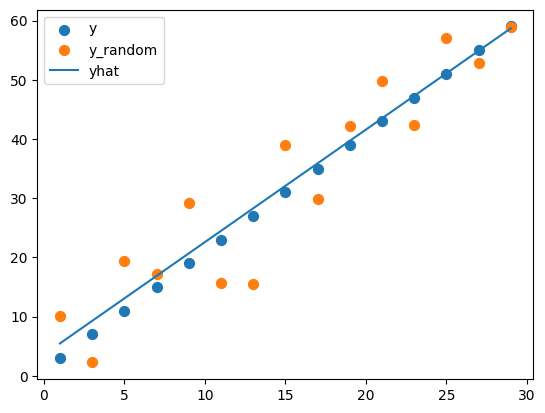

In [58]:
print("y_random = ", y_random.round(1))
print(" yhat = ", (b1*x + b0).round(1))

yhat = b1*x + b0

plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.plot(x, yhat, label = "yhat")
plt.legend()
plt.show()



In [59]:
# 이제부턴 라이브러리 이용

from sklearn.linear_model import LinearRegression


In [60]:
x

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [61]:
x_2d = x.reshape(-1, 1) #차원지정 (-1이라고 지정: 싸이킷런아 니가 알아서 계산해라)

print(x)
print(x_2d)
print(x_2d.shape)
print(x.shape)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]
 [27]
 [29]]
(15, 1)
(15,)


In [34]:
#x_2d = x.reshape(5, 3) #reshape 은 앞에껀 신경쓰지마. 뒤에꺼는 몇개씩 넣을거냐
#뒤에 3을 넣으면 -> 15를 3개씩 넣으려면 5줄이 되어야겠지
#print(x_2d) 

[[ 1  3  5]
 [ 7  9 11]
 [13 15 17]
 [19 21 23]
 [25 27 29]]


In [62]:
## class instance - 만들고 피팅하고 결과보고 끝 
lr = LinearRegression() #만듬


In [63]:
## fitting
lr.fit(x_2d, y_random)

LinearRegression()

In [56]:
## 결과보기 
print("coeff = ", lr.coef_)
print("intercept = ", lr.intercept_) 
#intercept: 절편
# y = 2x+1 이라면 x가 0일 때 예측값 y 는 1. 
# 즉 intercept 는 x값과 무관하게 y에 일정한 영향을 미치는 상수항.
# 즉 회귀선이 y축과 만나는 점 


coeff =  [1.90073609]
intercept =  3.566406385768893


In [57]:
## score / quality of fit (QOF)
lr.score(x_2d, y_random)

0.8679805034799591

In [34]:
##문제 
fpath = './dataset'


#csv file read
fname = 'cars.csv'
#file = os.path.join(fpath, frame)
cars_df = pd.read_csv(os.path.join(fpath, fname))
print(cars_df)
#print(file)

# cars_df = pd.read_csv("../dataset/cars.csv")



    speed  dist
0       4     2
1       4    10
2       7     4
3       7    22
4       8    16
5       9    10
6      10    18
7      10    26
8      10    34
9      11    17
10     11    28
11     12    14
12     12    20
13     12    24
14     12    28
15     13    26
16     13    34
17     13    34
18     13    46
19     14    26
20     14    36
21     14    60
22     14    80
23     15    20
24     15    26
25     15    54
26     16    32
27     16    40
28     17    32
29     17    40
30     17    50
31     18    42
32     18    56
33     18    76
34     18    84
35     19    36
36     19    46
37     19    68
38     20    32
39     20    48
40     20    52
41     20    56
42     20    64
43     22    66
44     23    54
45     24    70
46     24    92
47     24    93
48     24   120
49     25    85


In [35]:
## summary statistic
cars_df.describe()
print("Summary statistic :")
print(cars_df.agg(["mean", "std", "median", "min", "max"]).round(3))

Summary statistic :
         speed     dist
mean    15.400   42.980
std      5.288   25.769
median  15.000   36.000
min      4.000    2.000
max     25.000  120.000


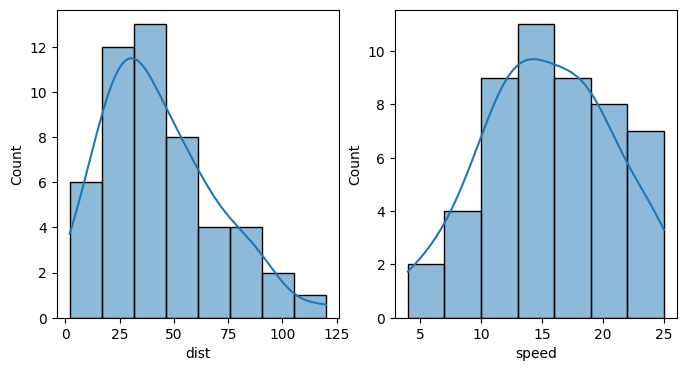

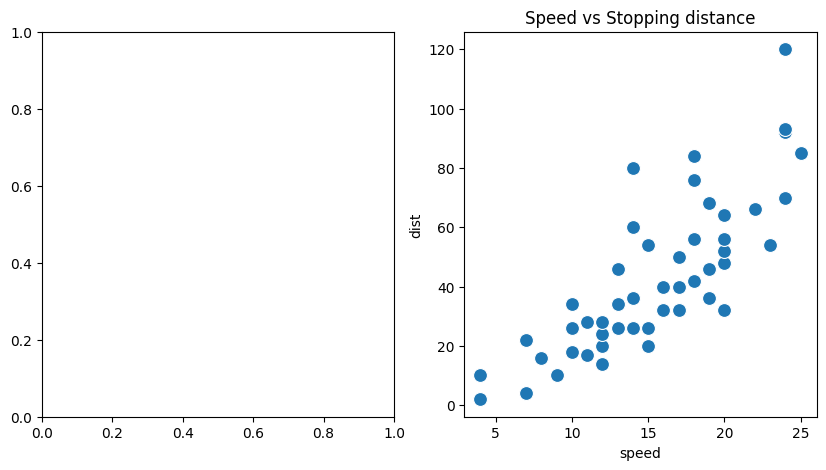

In [36]:
# Graph
fig, axs = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(cars_df, x = "dist", ax = axs[0], kde = True)
sns.histplot(cars_df, x = "speed", ax = axs[1], kde = True)
plt.show()

##
fig, axe = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(cars_df, y = "speed", ax = axs[0])
sns.boxplot(cars_df, y = "dist", ax = axs[1])

sns.scatterplot(cars_df, x = "speed", y = "dist", s = 100)
plt.title("Speed vs Stopping distance")
plt.show()

In [46]:
fpath = './dataset'
# fpath = r"C:\Develops\Python_Practice\Machine_learning\0906_DataFrame\dataset"
# fnamefile = os.pathcars_ 
# #csv file read
fname = 'cars.csv'
cars_df = pd.read_csv(os.path.join(fpath, fname))
print(cars_df.head())

cars_df[["speed"]]
print(cars_df[["speed"]])

   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16
    speed
0       4
1       4
2       7
3       7
4       8
5       9
6      10
7      10
8      10
9      11
10     11
11     12
12     12
13     12
14     12
15     13
16     13
17     13
18     13
19     14
20     14
21     14
22     14
23     15
24     15
25     15
26     16
27     16
28     17
29     17
30     17
31     18
32     18
33     18
34     18
35     19
36     19
37     19
38     20
39     20
40     20
41     20
42     20
43     22
44     23
45     24
46     24
47     24
48     24
49     25


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:

lr.fit(cars_df[["speed"]], cars_df["dist"])

LinearRegression()

In [58]:
## 
print("coeff = ", lr.coef_.round(3))
print("intercept = ", lr.intercept_.round(3))

coeff =  [3.932]
intercept =  -17.579


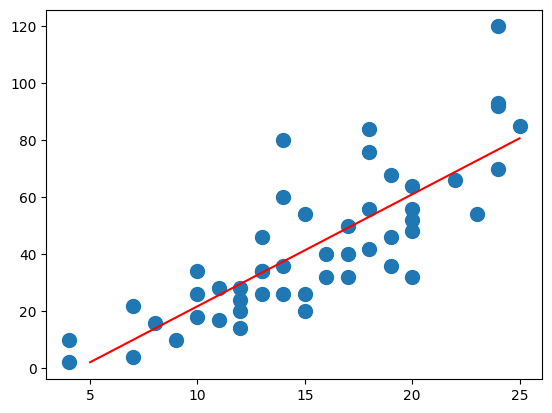

In [59]:
x_line = np.linspace(5, 25, 10)
plt.scatter(x = "speed", y = "dist", data=cars_df, s = 100)
plt.plot(x_line, 3.932*x_line - 17.579, c = "r")
plt.show()

In [62]:
mtcars = pd.read_excel("./dataset/mtcars.xlsx")
mtcars.head()



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [63]:
#연비예측이 목표 

lr = LinearRegression()


In [70]:
#fitting 
lr.fit(mtcars[["disp"]], mtcars["mpg"]) #x축, y축에 뭐 넣을지 정함. 
#머신러닝모델에서는 입력형태를 2차원형태로 받기때문에 [["gear"]] 처럼 괄호 두 개 
#displacement - 자동차 엔진의 배기량 


LinearRegression()

In [71]:

print("coeff = ", lr.coef_.round(3))
print("intercept = ", lr.intercept_.round(3))

coeff =  [-0.041]
intercept =  29.6


In [78]:
x_min = min(mtcars["disp"])
x_max = max(mtcars["disp"])
print(x_min)
print(x_max)

71.1
472.0


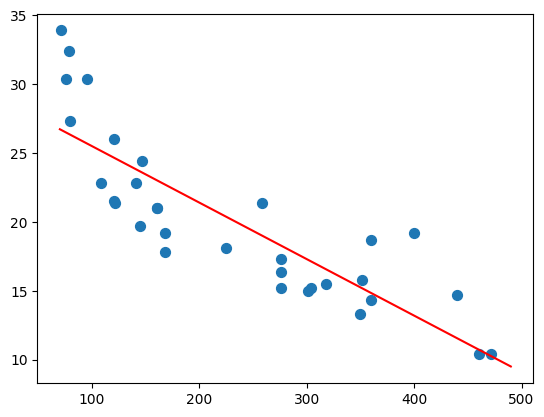

<Axes: xlabel='gear', ylabel='mpg'>

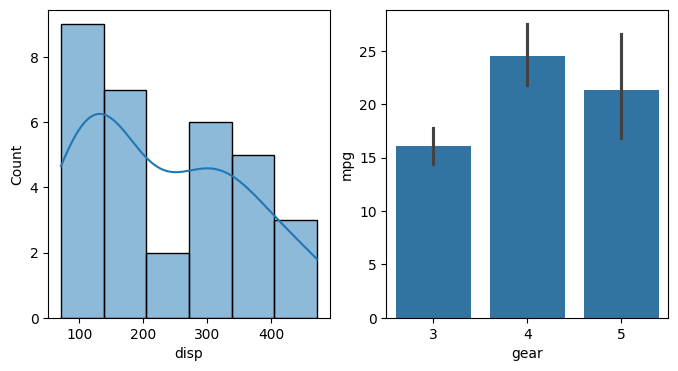

In [84]:
x_line = np.linspace(70, 490, 70)
plt.scatter(x = "disp", y = "mpg", data=mtcars, s = 50)
plt.plot(x_line, -0.041 *x_line + 29.6, c = "r")
plt.show()

#즉 배기량이 클수록 연비는 후지다. 


#Graph 
fig, axs = plt.subplots( 1, 2, figsize = (8, 4))
sns.histplot(mtcars, x = "disp", ax = axs[0], kde = True)
sns.barplot(mtcars, x = "gear", y = "mpg")


In [93]:
x = mtcars[['cyl', 'disp', 'hp', 'drat', 'wt']]
y = mtcars['mpg']
lr.fit(x, y)


LinearRegression()

In [94]:
print(lr.score(x, y))


0.8513151800973331


In [2]:
import pandas as pd
import os

cars_df = pd.read_csv('../dataset/cars.csv')
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
fpath = '../dataset'
fname = 'cars.csv'
file = os.path.join(fpath, fname)

cars_df = pd.read_csv(file)
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
